In [1]:
import os

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

import scanpy as sc

In [2]:
import sys
sys.path.append('../../')

from downstream.svg import detect_svg
from downstream.plotting import svgplot

import utils

# Config

In [3]:
# set global rc parameters
# sc.settings.set_figure_params(vector_friendly=True)

utils.config_rc(dpi=300, font_size=6)
# mpl.rcParams
wk_root = os.path.abspath(os.path.join(os.getcwd(), os.pardir, os.pardir))

In [4]:
# DLPFC 151673 data result root path
data_root = utils.get_path('svg_wk_root', json_path=os.path.join(wk_root, '_data.json'))
adata = sc.read_h5ad(os.path.join(data_root, "DLPFC_151673/SpaSEG_151673.h5ad"))

In [5]:
adata

AnnData object with n_obs × n_vars = 3639 × 18011
    obs: 'in_tissue', 'array_row', 'array_col', 'celltype', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'SpaSEG_discrete_clusters', 'SpaSEG_clusters', 'ground_truth_code'
    var: 'gene_ids', 'feature_types', 'genome', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells'
    uns: 'SpaSEG_clusters_colors', 'celltype_colors', 'metrics', 'pca', 'spatial'
    obsm: 'X_pca', 'spatial'
    varm: 'PCs'

# Detect SVG

In [6]:
# find SVG without filtering
# The purpose for doing this in this way is to analysis conveniently.

# d_svg,adata_ = detect_svg(adata, target_domains=['0','1','2','3','4','6'],do_filter=False)
# d_svg.to_csv(os.path.join(wk_root, 'notebook/results/SVG/svg_151673_All_Domains_except5_NotFilter.csv'), 
#              index=False)

In [7]:
d_svg = pd.read_csv(os.path.join(data_root, 
                                 'DLPFC_151673/svg_151673_All_Domains_except5_NotFilter.csv'))

In [8]:
d_svg

,gene,pvals_adj,log2_fc,in_fraction,out_fraction,max_fraction,in_expr_mean_log,in_expr_cv,max_expr_mean_log,max_expr_cv,max_expr_domain,log2_fc_in_max,domain,cv_r,in_out_fraction,in_max_fraction
0,MBP,0.000000e+00,97.821465,1.000000,0.976198,0.997509,4.347785,0.328454,2.267892,0.479113,4,97.595735,0,0.685547,1.024382,1.002497
1,PLP1,5.873266e-303,58.132706,1.000000,0.883926,0.965131,3.818471,0.398403,1.626687,0.779300,4,58.377904,0,0.511232,1.131317,1.036129
2,CRYAB,5.921650e-292,18.712570,0.998252,0.744376,0.824408,2.739364,0.462848,0.979803,0.904704,4,18.788468,0,0.511602,1.341059,1.210870
3,CNP,4.083523e-289,17.798828,0.996503,0.703619,0.768369,2.683494,0.464164,0.891452,0.919708,4,17.987938,0,0.504686,1.416254,1.296908
4,GFAP,3.607005e-280,20.838974,0.998252,0.789697,0.871324,2.874732,0.453802,1.703105,0.990955,1,17.659987,0,0.457944,1.264095,1.145673
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107983,STMN1,2.088959e-20,-2.979928,0.694690,0.970700,0.997509,1.482651,0.914166,2.044205,0.420769,4,-4.834459,6,2.172609,0.715659,0.696425
107984,TUBA1A,9.910952e-24,-3.405634,0.637168,0.964254,0.998252,1.299988,1.033844,2.367974,0.441105,0,-10.211753,6,2.343757,0.660788,0.638284
107985,SCGB2A2,9.610033e-24,-4.712508,0.327434,0.722531,0.893357,1.043455,2.431460,1.859538,0.977097,0,-5.410773,6,2.488452,0.453176,0.366521
107986,PLP1,3.941870e-24,-13.002025,0.544248,0.925872,1.000000,1.175230,1.264811,3.818471,0.398403,0,-61.182314,6,3.174702,0.587822,0.544248


In [9]:
df_group = d_svg.copy()

max_p=0.05
max_in_p=0.05
min_in_frac=0.75
min_log2fc=1.5
min_log2fc_in_max=1.5

min_in_out_frac=1.
min_in_max_frac=0.95

cut_min_in_out_frac=1.2
cut_min_log2fc=3.0
cut_min_log2fc_in_max=3.0
cut_min_in_max_frac=1.2
cut_min_in_expr_cv=0.6
cut_max_cv_r = 1.0

min_high_log2_fc=8

pre_req = (
    (df_group['pvals_adj'] < max_p) &
    (df_group['in_fraction'] > min_in_frac) &
    (df_group['log2_fc_in_max'] > min_log2fc_in_max) &
    (df_group['log2_fc'] > min_log2fc) &
    (df_group['in_max_fraction'] > min_in_max_frac) &
    (df_group['in_out_fraction'] > min_in_out_frac)
)

df_group=df_group.loc[pre_req]
                     
cond1_cut = ((df_group['in_out_fraction']> cut_min_in_out_frac) | (df_group['in_max_fraction']> cut_min_in_max_frac))

cond2_cut = ((df_group['log2_fc']>cut_min_log2fc) &
             (df_group['log2_fc_in_max']>cut_min_log2fc_in_max) & 
             (df_group['in_max_fraction'] > min_in_max_frac) &
             (df_group['in_out_fraction'] > min_in_out_frac) &
             (df_group['in_expr_cv']<cut_min_in_expr_cv)&
             (df_group['cv_r']<cut_max_cv_r))

# df_group=df_group.loc[cond1_cut|cond2_cut]

cond3_cut= (df_group['log2_fc']> min_high_log2_fc) 

df_group=df_group.loc[cond1_cut|cond2_cut|cond3_cut]

print(df_group.shape[0])
df_group

81


,gene,pvals_adj,log2_fc,in_fraction,out_fraction,max_fraction,in_expr_mean_log,in_expr_cv,max_expr_mean_log,max_expr_cv,max_expr_domain,log2_fc_in_max,domain,cv_r,in_out_fraction,in_max_fraction
0,MBP,0.000000e+00,97.821465,1.000000,0.976198,0.997509,4.347785,0.328454,2.267892,0.479113,4,97.595735,0,0.685547,1.024382,1.002497
1,PLP1,5.873266e-303,58.132706,1.000000,0.883926,0.965131,3.818471,0.398403,1.626687,0.779300,4,58.377904,0,0.511232,1.131317,1.036129
2,CRYAB,5.921650e-292,18.712570,0.998252,0.744376,0.824408,2.739364,0.462848,0.979803,0.904704,4,18.788468,0,0.511602,1.341059,1.210870
3,CNP,4.083523e-289,17.798828,0.996503,0.703619,0.768369,2.683494,0.464164,0.891452,0.919708,4,17.987938,0,0.504686,1.416254,1.296908
4,GFAP,3.607005e-280,20.838974,0.998252,0.789697,0.871324,2.874732,0.453802,1.703105,0.990955,1,17.659987,0,0.457944,1.264095,1.145673
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71992,TMSB10,1.505164e-172,8.577878,1.000000,0.986601,0.998797,2.753438,0.348494,2.366349,0.335888,3,7.268537,4,1.037528,1.013581,1.001205
71993,SNAP25,2.034024e-118,7.214002,0.998755,0.969676,0.998797,2.734460,0.317478,2.543755,0.352395,3,3.857857,4,0.900914,1.029988,0.999958
71994,PCP4,1.382927e-103,2.886989,0.770859,0.394217,0.585739,1.057260,0.965698,0.510352,1.150275,2,2.550584,4,0.839537,1.955418,1.316047
71996,SYT1,4.713341e-89,3.468207,0.997509,0.886812,0.983022,2.025188,0.430809,1.631239,0.480513,2,3.581461,4,0.896561,1.124826,1.014737


In [12]:
df_group.to_csv(os.path.join(wk_root, 'notebook/results/SVG/svg_151673_All_Domain_except5_Filtered_0.75_8.csv'), 
                index=False)

# Plot 4 genes

In [4]:
df_group = pd.read_csv(os.path.join(data_root, 
                                    'DLPFC_151673/svg_151673_All_Domain_except5_Filtered_0.75_8.csv'))

In [6]:
len(df_group['gene'].unique())

81

In [7]:
df_group['domain'].value_counts()

0    73
4     5
2     2
3     1
Name: domain, dtype: int64

In [8]:
from matplotlib.colors import ListedColormap,LinearSegmentedColormap

# clist=['#66c2a5','#fee08b','#d73027']
# clist=['#d01c8b','#f1b6da','#f7f7f7','#4dac26'][::-1]
# clist = ['#d73027','#f46d43','#fdae61','#fee090','#e0f3f8','#abd9e9','#74add1'][::-1]
clist=['#a50026','#d73027','#f46d43','#fdae61','#fee090','#e0f3f8','#abd9e9','#74add1','#4575b4'][::-1]
newcmp_r_svg_pattern = LinearSegmentedColormap.from_list('gene_cmap',clist,N=256)

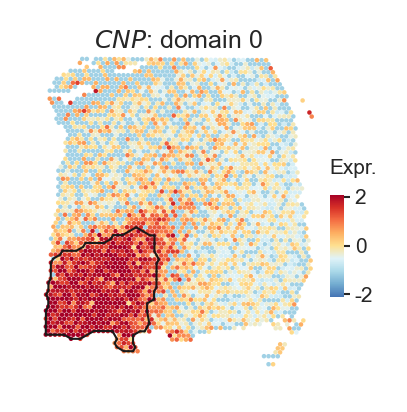

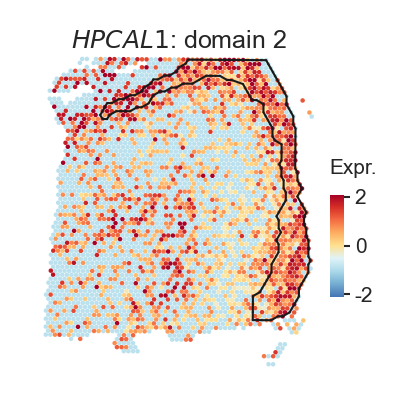

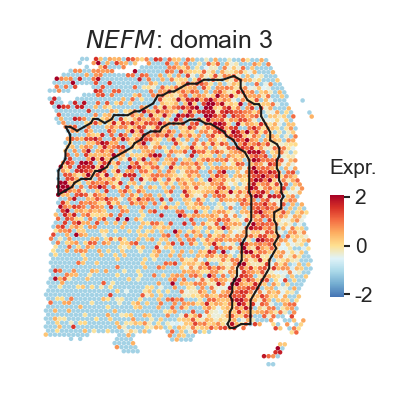

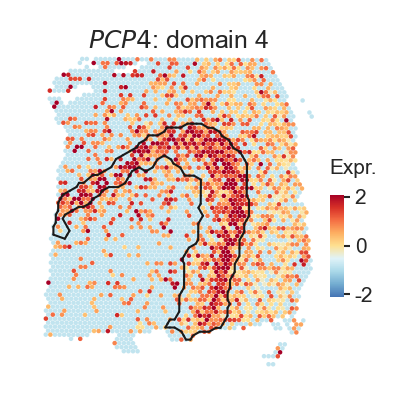

In [25]:
from matplotlib.colors import ListedColormap,LinearSegmentedColormap

gene_fig = ['CNP','HPCAL1','NEFM','PCP4']
domain = ['0','2','3','4']

for i in range(len(gene_fig)):
    gene = gene_fig[i]
    svgplot(adata, genes=[gene], frameon=False, panel_cbar=True, target_domain=[domain[i]],cbar_wid_r=0.05,domain_edge_color='k',
        axes_w_cm=3.5, size=1.4, domain_edge_alpha=200,img_key=None, cmap=newcmp_r_svg_pattern, wspace=0.001, hspace=0.01)
    
    plt.savefig(os.path.join(wk_root, f'notebook/results/SVG/svg_151673_{gene}.pdf'), bbox_inches='tight', format='pdf', dpi=400)

# Plot all genes

In [9]:
# gene_fig = ['CNP','HPCAL1','NEFM','PCP4']
# domain = ['0','2','3','4']
# svgs_1 = df_group[~(df_group['gene'].isin(gene_fig))].copy()

svgs_1 = df_group.copy()
svgs_1.sort_values(by=['domain','gene'], inplace=True, ignore_index=True)
svgs_1['domain'] = svgs_1['domain'].astype('string') 

In [10]:
def to_matrix(l, n):
    return [l[i:i+n] for i in range(0, len(l), n)]
    

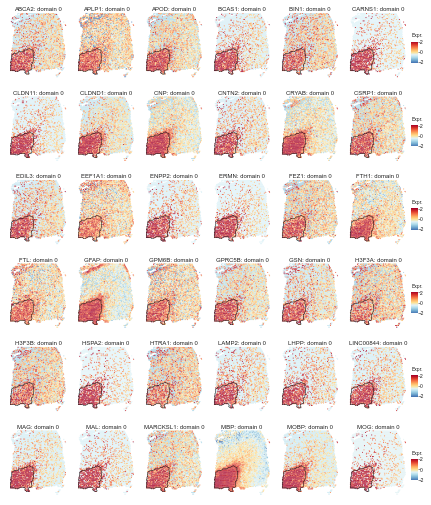

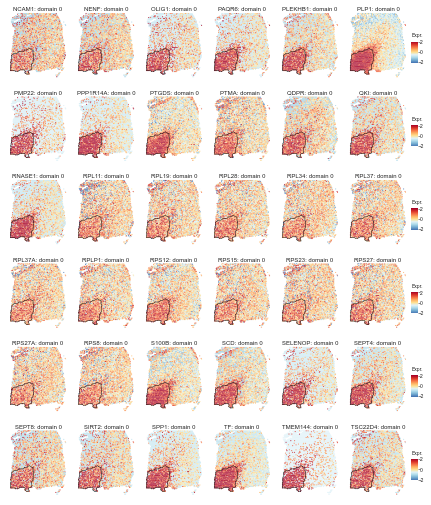

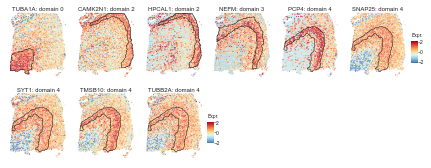

In [11]:
n_genes_page = 36
_domain_genes = to_matrix(svgs_1['gene'].tolist(), n_genes_page)

_target_domain = to_matrix(svgs_1['domain'].tolist(), n_genes_page)

for i in range(len(_domain_genes)):
    svgplot(adata, genes=_domain_genes[i], frameon=False, panel_cbar=False, target_domain=_target_domain[i],cbar_wid_r=0.1, ncols=6,domain_edge_color='k',
        axes_w_cm=3, size=1.5, domain_edge_alpha=200,img_key=None, cmap=newcmp_r_svg_pattern, wspace=0.001, hspace=0.01)
    plt.savefig(os.path.join(wk_root, f'notebook/results/SVG/svg_151673_{i}_{n_genes_page}.pdf'), bbox_inches='tight', format='pdf', dpi=400)